In [11]:
# Changes to modules not reflected in this notebook without this
%load_ext autoreload
%autoreload

from etl import (
    delete_data_dir, 
    download_data,
    get_stock_data,
)

from calc import (
    get_target_tickers,
    visualise_dataframes
)

from financials import (
    get_all_earnings_info,
    show_earnings_info
)


from tickers import tickers

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import time
from datetime import datetime
import pytz
from IPython.display import clear_output

from playsound import playsound


In [66]:
delete_data_dir()
# tickers, len(tickers)

In [3]:
today = time.strftime("%Y-%m-%d")
data_dir = f'data/{today}'
period = '3mo'
interval = '1d'
ma_and_std_window = 20

multi_df = get_stock_data(tickers, period, interval, ma_and_std_window, today, data_dir)

Today's data exists. Reusing it.
Using existing data for AAPL.
Using existing data for MSFT.


[*********************100%%**********************]  1 of 1 completed
AAPL, Slope: 0.4455359210898165, Intercept: 169.09702574656546
[*********************100%%**********************]  1 of 1 completed


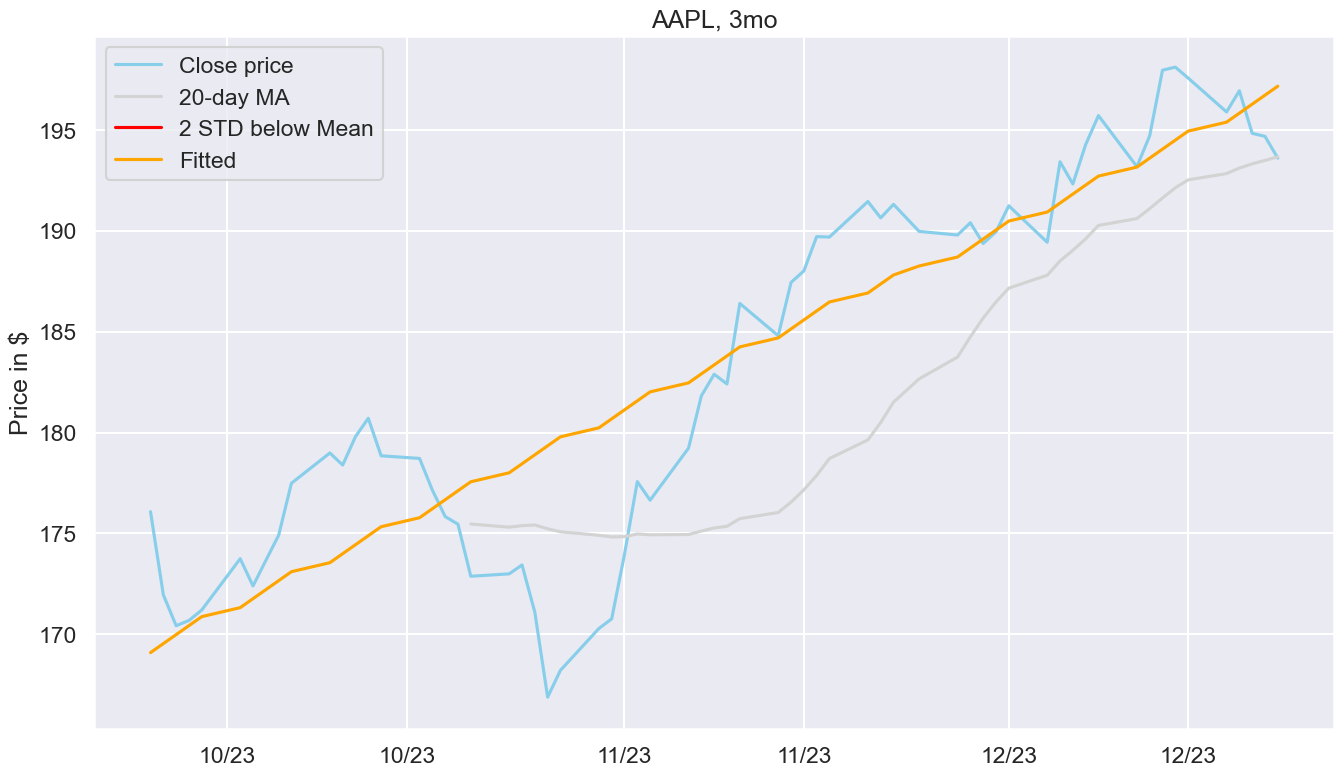

In [4]:
suitable = get_target_tickers(multi_df)
visualise_dataframes(suitable, period, ma_and_std_window)

In [12]:
info_list = get_all_earnings_info(suitable)

AAPL


In [15]:
show_earnings_info(info_list)

,,period,strongBuy,buy,hold,sell,strongSell
symbol,row,,,,,,
AAPL,0,0m,11,21,6,0,0


In [16]:
now = datetime.now(tz=pytz.timezone('US/Eastern'))
current_hour = now.hour
current_minute = now.minute
current_second = now.second
current_weekday = now.weekday()
now

datetime.datetime(2023, 6, 6, 15, 7, 31, 31390, tzinfo=<DstTzInfo 'US/Eastern' EDT-1 day, 20:00:00 DST>)

In [17]:
# min = 900 # 15 min
min = 900

def keep_running(multi_df_last_period, tickers, min):
    watchlist = []
    
    while True:
        clear_output(wait=False)
        print("New round")
        multi_df_today = download_data(tickers, '1d', interval)
        
        for ticker in tickers:
            df_last_period = multi_df_last_period[ticker]
            two_std_below_mean = df_last_period.iloc[len(df_last_period)-2]['2 STD Below Mean'].item()
            
            latest_close = multi_df_today[ticker]['Close'].item()
                
            if latest_close < two_std_below_mean and ticker not in watchlist:
                
                watchlist.append({
                    "ticker": ticker,
                    "close": latest_close
                })
                
                df_last_period.to_csv(f"new results/{ticker}.csv")
                
                playsound('sound.mp3')
        
        for item in watchlist:
            # Save this to file so we can work on it in another nb
            print(f"{item['ticker']}: {item['close']}")

        time.sleep(min)

# keep_running(multi_df, tickers, min)